In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diamond_price = pd.read_csv('diamonds.csv')
diamond_price.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond_price['clarity'].nunique()

8

In [4]:
diamond_price['color'].nunique()

7

In [5]:
diamond_price['cut'].nunique()

5

<AxesSubplot:xlabel='cut', ylabel='count'>

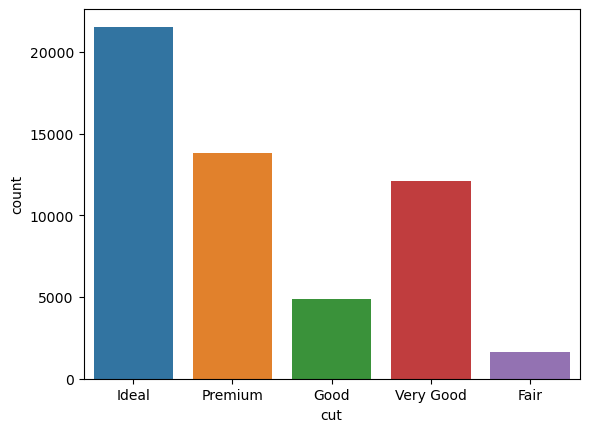

In [6]:
sns.countplot(data=diamond_price,x='cut')

<AxesSubplot:xlabel='color', ylabel='count'>

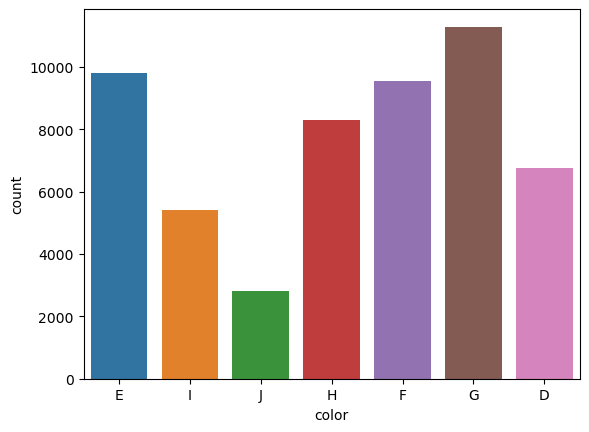

In [7]:
sns.countplot(data=diamond_price,x='color')

In [8]:
diamond_price.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
#color
#diamond colour, from J (worst) to D (best)

diamond_price['color'] = diamond_price['color'].replace(['D','E','F','G','H','I','J',],[0,1,2,3,4,5,6])
diamond_price.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,6,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamond_price['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [11]:
#cut
#quality of the cut (Fair, Good, Very Good, Premium, Ideal)

diamond_price['cut'] = diamond_price['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[0,1,2,3,4])

In [12]:
diamond_price['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [13]:
#clarity
#a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

diamond_price['clarity'] = diamond_price['clarity'].replace(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],[0,1,2,3,4,5,6,7])

In [14]:
diamond_price.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,1,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,1,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,1,5,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,6,1,63.3,58.0,335,4.34,4.35,2.75


In [15]:
diamond_price.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [16]:
X = diamond_price.drop(['Unnamed: 0','price'],axis=1)
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,0,1,1,61.5,55.0,3.95,3.98,2.43
1,0.21,1,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,3,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,1,5,3,62.4,58.0,4.20,4.23,2.63
4,0.31,3,6,1,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,3,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,1,4,1,61.0,58.0,6.15,6.12,3.74


In [17]:
y = diamond_price["price"]
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

In [32]:
regresion1 = LinearRegression()

In [30]:
regresion.fit(X_train,y_train)

LinearRegression()

In [34]:
pickle.dump(regresion1,open("scalled_data1.pkl",'wb'))

In [25]:
#prediction = regresion.predict(X_test)

In [26]:
prediction

NameError: name 'prediction' is not defined

In [ ]:
sns.scatterplot(x=prediction,y=y_test,alpha=0.6)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(y_test,prediction))
print(mean_squared_error(prediction,y_test))
print(np.sqrt(mean_squared_error(prediction,y_test)))

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test,prediction))

In [28]:
# Pickling the file

import pickle

In [ ]:
pickle.dump(prediction,open('diamond_price.pkl','wb'))

In [ ]:
pickle.dump(diamond_price,open('diamond_df.pkl','wb'))

In [ ]:
diamond_price.head()